# Case Study (Timeseries in pandas)

Working with real-world weather and climate data, you will use pandas to manipulate the data into a usable form for analysis. Your task is compare observed weather data from two sources:

- Climate normals of Austin, TX from 1981-2010,
- Weather data of Austin, TX from 2011.

Source: National Oceanic & Atmospheric Administration, [www.noaa.gov/climate](www.noaa.gov/climate).

In [1]:
import pandas as pd

## Reading and cleaning the data

Upon inspection with a certain system tool, we find that the data appears to be ASCII encoded with comma delimited columns, but has no header and no column labels.

## Reading in a data file
Let's try to read one file. The problem with real data such as this is that the files are almost never formatted in a convenient way.

In this exercise, there are several problems to overcome in reading the file:
- First, there is no header, and thus the columns don't have labels. 
- There is also no obvious index column, since none of the data columns contain a full date or time.

Your job is to read the file into a DataFrame using the default arguments. After inspecting it, you will re-read the file specifying that there are no headers supplied.

In [3]:
data_file = 'data/weather_case_study.csv'

In [4]:
# Read in the data file: df
df = pd.read_csv(data_file)

# Print the output of df.head()
df.head()

,Unnamed: 0,13904,20110101,0053,12,OVC045,,10.00,.1,.2,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,0,13904,20110101,153,12,OVC049,,10.00,,,...,,,30.01,,AA,,,,30.02,
1,1,13904,20110101,253,12,OVC060,,10.00,,,...,030,,30.01,,AA,,,,30.02,
2,2,13904,20110101,353,12,OVC065,,10.00,,,...,,,30.03,,AA,,,,30.04,
3,3,13904,20110101,453,12,BKN070,,10.00,,,...,,,30.04,,AA,,,,30.04,
4,4,13904,20110101,553,12,BKN065,,10.00,,,...,015,,30.06,,AA,,,,30.06,


In [10]:
# Read in the data file with header=None: df_headers
df = pd.read_csv(data_file, header=None)
df = df.drop([0], axis=1)

# Print the output of df_headers.head()
df.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,13904,20110101,53,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


## Re-assigning column names

After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.
In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

In [7]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']

In [11]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df = df.drop(list_to_drop, axis='columns')

df.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15.1,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning and tidying datetime data

In order to use the full power of pandas time series, you must construct a `DatetimeIndex`. To do so, it is necessary to clean and transform the date and time columns.

Your job is to clean up the date and Time columns and combine them into a datetime collection to be used as the `Index`.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null int64
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(3), object(14)
memory usage: 1.3+ MB


In [17]:
# Convert the date column to string: df_dropped['date']
df['date'] = df['date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null int64
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(3), object(14)
memory usage: 1.3+ MB


In [18]:
# Pad leading zeros to the Time column: df_dropped['Time']
df['Time'] = df['Time'].apply(lambda x:'{:0>4}'.format(x))
df.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15.1,360,29.42,29.95
1,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [22]:
# Concatenate the new date and Time columns: date_string
date_string = df['date'] + df['Time']
date_string[0:10]

0    201101010053
1    201101010153
2    201101010253
3    201101010353
4    201101010453
5    201101010553
6    201101010653
7    201101010753
8    201101010853
9    201101010953
dtype: object

In [26]:
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
date_times[0:10]

0   2011-01-01 00:53:00
1   2011-01-01 01:53:00
2   2011-01-01 02:53:00
3   2011-01-01 03:53:00
4   2011-01-01 04:53:00
5   2011-01-01 05:53:00
6   2011-01-01 06:53:00
7   2011-01-01 07:53:00
8   2011-01-01 08:53:00
9   2011-01-01 09:53:00
dtype: datetime64[ns]

In [27]:
# Set the index to be the new date_times container: df_clean
df_clean = df.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15.1,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning the numeric columns

The numeric columns contain missing values labeled as `'M'`. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as `NaN`.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like `'M'` to be interpreted as `NaN`.

In [28]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-06-20 8:00':'2011-06-20 9:00', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

In [30]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean['dry_bulb_faren'].head()

2011-01-01 00:53:00    51.0
2011-01-01 01:53:00    51.0
2011-01-01 02:53:00    51.0
2011-01-01 03:53:00    50.0
2011-01-01 04:53:00    50.0
Name: dry_bulb_faren, dtype: float64

In [31]:
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-06-20 8:00':'2011-06-20 9:00', 'dry_bulb_faren']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [81]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

In [33]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.1,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


## Signal min, max, median

Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data. Your job in this exercise is to analyze the `'dry_bulb_faren'` column and print the median temperatures for specific time ranges. You can do this using **partial datetime string selection**.

In [34]:
# Print the median of the dry_bulb_faren column
df_clean.dry_bulb_faren.median()

72.0

In [35]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median()

78.0

In [36]:
# Print the median of the dry_bulb_faren column for the month of January
df_clean.loc['2011-Jan', 'dry_bulb_faren'].median()

48.0

## Signal variance

You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

Your job is to first resample `df_clean` and `df_climate` by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - `'dry_bulb_faren'` in `df_clean`, and `'Temperature'` in `df_climate` - as NumPy arrays and compute the difference.

Notice that the indexes of `df_clean` and `df_climate` are not aligned - `df_clean` has dates in 2011, while `df_climate` has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas `.reset_index()` method to make sure the Series align properly. You will practice this approach as well.

In [40]:
data_file = 'data/weather_case_study2.csv'

In [50]:
# Read in the data file: df
df_climate = pd.read_csv(data_file, index_col='Date', parse_dates=True)

# Print the output of df.head()
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [51]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.087500
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [52]:
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values
daily_temp_2011[0:10]

array([50.16666667, 39.41666667, 46.84615385, 53.36734694, 57.96551724,
       46.95833333, 51.91666667, 51.81481481, 43.61363636, 38.27777778])

In [53]:
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [55]:
# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']
daily_temp_climate[0:10]

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
5    49.679167
6    49.491667
7    49.366667
8    49.354167
9    49.354167
Name: Temperature, dtype: float64

In [56]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
difference.mean()

1.3301831870056482

## Sunny or cloudy

On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter for sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day. The column `'sky_condition'` provides information about whether the day was sunny ('CLR') or overcast ('OVC').

In [57]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [58]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.1,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


In [59]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246575
dtype: float64


The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.

## Weekly average temperature and visibility

Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the **Pearson correlation coefficient** using `.corr()`. The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

In [84]:
df_clean[['visibility', 'dry_bulb_faren']].head()

,visibility,dry_bulb_faren
2011-01-01 00:53:00,10.0,51.0
2011-01-01 01:53:00,10.0,51.0
2011-01-01 02:53:00,10.0,51.0
2011-01-01 03:53:00,10.0,50.0
2011-01-01 04:53:00,10.0,50.0


In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10324 non-null float64
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 1.7+ MB


In [85]:
df_clean['visibility'].value_counts()

10.00    8419
8.00      328
9.00      293
7.00      264
6.00      209
2.00      138
5.00      135
3.00      134
4.00       94
2.50       77
1.50       67
1.00       48
0.25       27
0.75       27
0.50       26
1.25       21
0.12        6
0.00        6
1.75        5
Name: visibility, dtype: int64

In [86]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()
weekly_mean.head()

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.791667
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188


In [87]:
# Print the output of weekly_mean.corr()
weekly_mean.corr()

,visibility,dry_bulb_faren
visibility,1.000000,0.490328
dry_bulb_faren,0.490328,1.000000


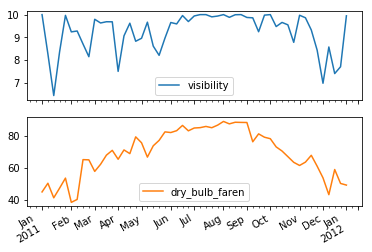

In [88]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show();

## Daily hours of clear sky

In a previous exercise, you analyzed the `'sky_condition'` column to explore the difference in temperature on sunny days compared to overcast days. Recall that a `'sky_condition'` of `'CLR'` represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The `'sky_condition'` column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

In [89]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean.sky_condition == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [90]:
# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

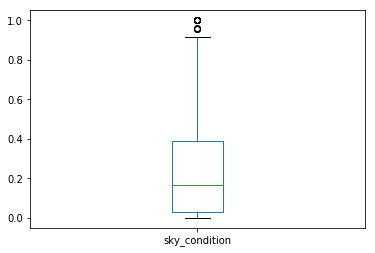

In [91]:
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show();

The weather in the dataset is typically sunny less than 40% of the time.